<font size = 6>Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pck
import sys 
import os
import importlib.util

# spec_win = importlib.util.spec_from_file_location('lumapi', 'C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')
# lumapi = importlib.util.module_from_spec(spec_win)
# os.add_dll_directory("C:/Program Files/Lumerical/v202/api/python")
# sys.path.append(os.path.dirname('C:/Users/andre/Documents/UFCG/Photonics/Arquivos/Edge-coupler'))
# spec_win.loader.exec_module(lumapi)

spec_win = importlib.util.spec_from_file_location('lumapi', 'C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py')
lumapi = importlib.util.module_from_spec(spec_win)
os.add_dll_directory("C:/Program Files/Lumerical/v221/api/python")
sys.path.append(os.path.dirname('C:/Users/PC/Documents/Photonics/Edge-coupler'))
spec_win.loader.exec_module(lumapi)

C:\Program Files\Lumerical\v221\api\python\lumapi.py:796: SyntaxWarning: invalid escape sequence '\s'
  message = re.sub('^(Error:)\s(prompt line)\s[0-9]+:', '', str(rvals[2])).strip()


In [2]:
coupler = lumapi.MODE(filename = 'edge_coupler.lms')

<font size = 6>Coupler Assembly

In [301]:
coupler.switchtolayout()
coupler.selectall()
coupler.delete()

coupler.addobject('linear_taper')
coupler.set({
    'name'          : 'Coupler',
    'x'             : 0,
    'y'             : 0,
    'z'             : 0,
    'thickness'     : 220e-9,
    'angle_side'    : 90,
    'width_l'       : 450e-9,
    'width_r'       : 150e-9,
    'len'           : 25e-6,
    'material'      : 'Si (Silicon) - Palik'
})

coupler.addrect()
coupler.set({
    'name'          : 'waveguide',
    'x'             : -13.5e-6,
    'x span'        : 2e-6,
    'y'             : 0,
    'y span'        : 450e-9,
    'z'             : 0,
    'z span'        : 220e-9,
    'material'      : 'Si (Silicon) - Palik'
})

coupler.addobject('cc_fiber')
coupler.set({
    'first axis'        : 'y',
    'rotation 1'        : 90,
    'x'                 : 15e-6,
    'y'                 : 0,
    'z'                 : 0,
    'index cladding'    : 1.4348,
    'index core'        : 1.44,
    'radius core'       : 4.1e-6,
    'radius cladding'   : 62.5e-6,
    'z span'            : 5e-6,
    'enabled'           : False
})

coupler.addeme()
coupler.set({
    'background material'       : 'SiO2 (Glass) - Palik',
    'x min'                     : -14.5e-6,
    'y'                         : 0,
    'y span'                    : 20e-6,
    'z'                         : 0,
    'z span'                    : 20e-6,
    'number of cell groups'     : 3,
    'group spans'               : np.transpose([2e-6, 25e-6, 1e-6]),
    'cells'                     : np.transpose([1, 20, 1]),
    'subcell method'            : np.transpose([0, 1, 0]),
    'mesh cells y'              : 100,
    'mesh cells z'              : 100,
    #'y min bc'                  : 'Anti-Symmetric',
    'y max bc'                  : 'PML',
    'Z min bc'                  : 'Metal',
    'Z max bc'                  : 'Metal',
})

coupler.addemeindex()
coupler.set({
    'name'                      : 'index',
    'x'                         : -0.5e-6,
    'x span'                    : 28e-6,
    'y'                         : 0,
    'y span'                    : 20e-6,
})

coupler.addemeprofile()
coupler.set({
    'name'                      : 'profile',
    'x'                         : -0.5e-6,
    'x span'                    : 28e-6,
    'y'                         : 0,
    'y span'                    : 20e-6,
})

coupler.addfde()
coupler.set({
    'solver type'               : '2D X normal',
    'background material'       : 'SiO2 (Glass) - Palik',
    'x'                         : 12.5e-6,
    'y'                         : 0,
    'y span'                    : 4e-6,
    'z'                         : 0,
    'z span'                    : 4e-6,
    'mesh cells y'              : 400,
    'mesh cells z'              : 400,
})

coupler.addmesh()
coupler.set({
    'x'                         : -0.5e-6,
    'x span'                    : 28e-6,
    'y'                         : 0,
    'y span'                    : 500e-9,
    'z'                         : 0,
    'z span'                    : 250e-9,
    'set mesh multiplier'       : True,
    'override x mesh'           : False,
    'y mesh multiplier'         : 5,
    'z mesh multiplier'         : 5, 
    'enabled'                   : False          
})

<font size = 6> Coupler modes

,neff
1,1.462901
2,1.443416
3,1.419275
4,1.417782
5,1.403615
6,1.393545
7,1.391162
8,1.391082
9,1.377486
10,1.377483


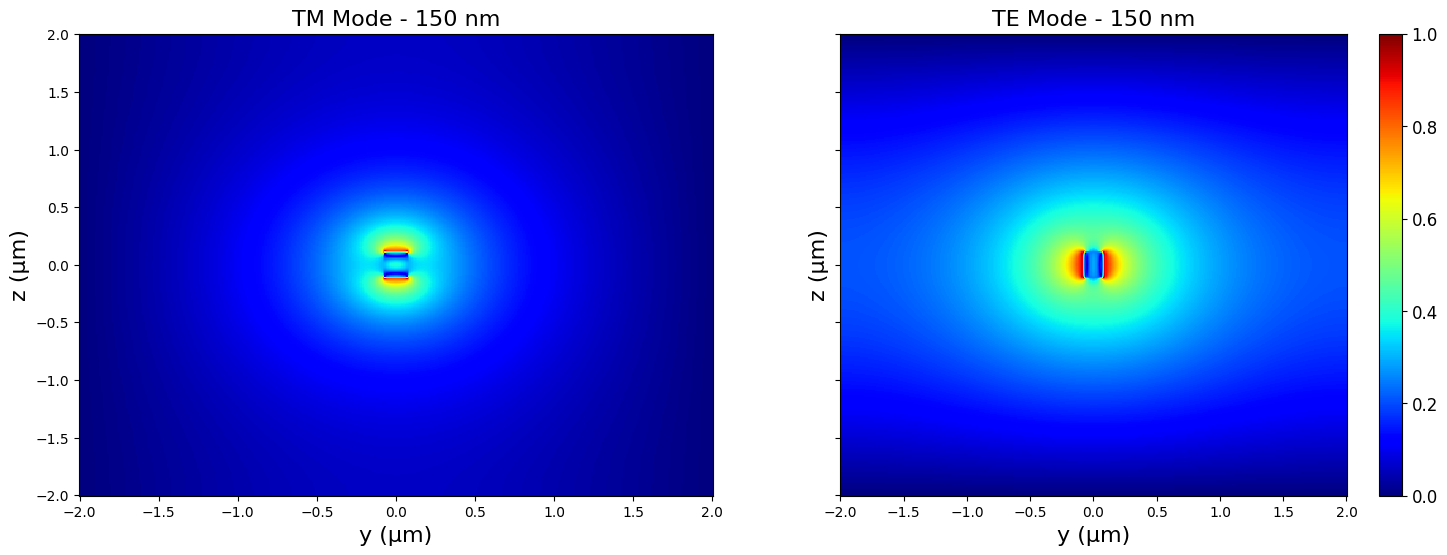

In [203]:
coupler.run()
coupler.findmodes()

tm_mode = coupler.getresult('FDE::data::mode1', 'E')
y_tm = tm_mode['y']
z_tm = tm_mode['z']
E_tm = tm_mode['E']

E_tm = np.sqrt(E_tm[:,:,:,:,0]**2 + E_tm[:,:,:,:,1]**2 + E_tm[:,:,:,:,2]**2)
E_tm = np.transpose(abs(E_tm[0,:,:,0]))

figure, axis = plt.subplots(1, 2, figsize = (18,6), sharex = True, sharey = True)
axis[0].pcolormesh(y_tm[:,0]*1e6,z_tm[:,0]*1e6,E_tm,cmap = 'jet',vmin=0, vmax = 1)
axis[0].set_xlabel('y (μm)',fontsize=16)
axis[0].set_ylabel('z (μm)',fontsize=16)
axis[0].set_title('TM Mode - 150 nm', fontsize=16)

te_mode = coupler.getresult('FDE::data::mode2', 'E')
y_te = te_mode['y']
z_te = te_mode['z']
E_te = te_mode['E']

E_te = np.sqrt(E_te[:,:,:,:,0]**2 + E_te[:,:,:,:,1]**2 + E_te[:,:,:,:,2]**2)
E_te = np.transpose(abs(E_te[0,:,:,0]))

mesh = axis[1].pcolormesh(y_te[:,0]*1e6,z_te[:,0]*1e6,E_te,cmap = 'jet',vmin=0, vmax = 1)
axis[1].set_xlabel('y (μm)',fontsize=16)
axis[1].set_ylabel('z (μm)',fontsize=16)
axis[1].set_title('TE Mode - 150 nm', fontsize=16)
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=12)

index = np.arange(1, 21)
modes = []
for i in index:
    mode = coupler.getresult('FDE::data::mode' + str(i), 'neff')
    modes.append(np.real(mode[0][0]))

data = pd.DataFrame(data = modes, index = index, columns=['neff'])
data

<font size = 6>Fiber modes

,neff
1,1.437013
2,1.437013
3,1.434263
4,1.434258
5,1.433629
6,1.433624
7,1.433222
8,1.433222
9,1.432270
10,1.432270


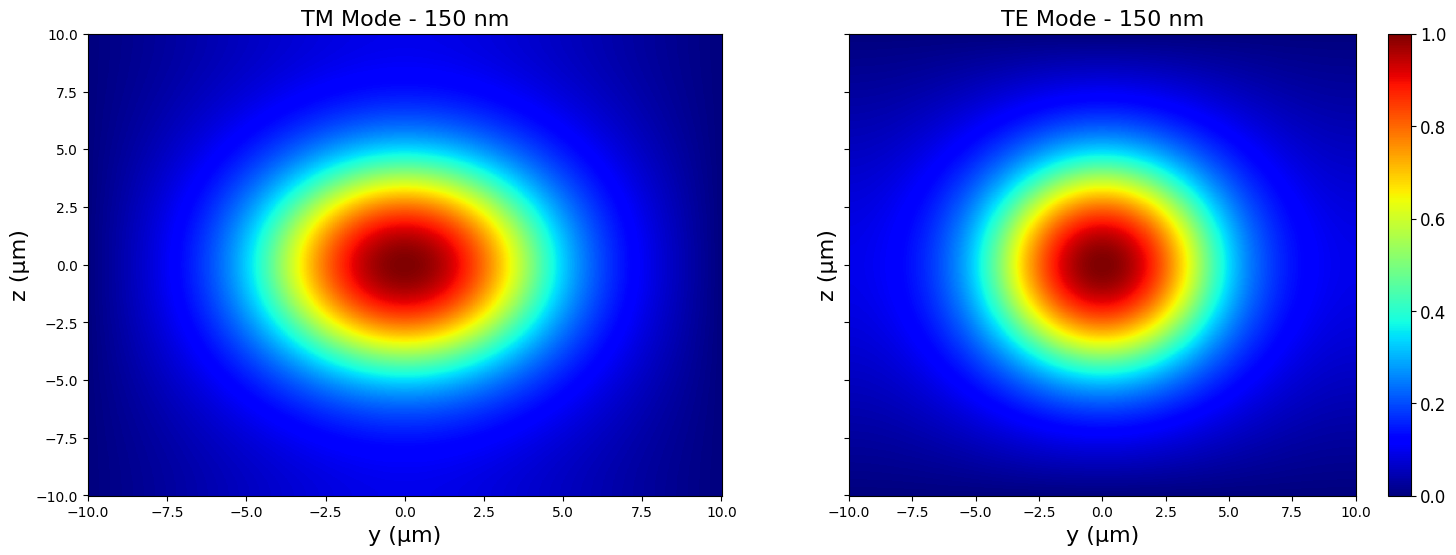

In [214]:
coupler.switchtolayout()

coupler.setnamed('cc_fiber', {'enabled' : True})

coupler.setnamed('FDE', {
    'solver type'               : '2D X normal',
    'background material'       : 'SiO2 (Glass) - Palik',
    'x'                         : 14e-6,
    'y span'                    : 20e-6,
    'z span'                    : 20e-6,
    'mesh cells y'              : 1000,
    'mesh cells z'              : 1000,
})

coupler.run()
coupler.findmodes()

tm_mode = coupler.getresult('FDE::data::mode1', 'E')
y_tm = tm_mode['y']
z_tm = tm_mode['z']
E_tm = tm_mode['E']

E_tm = np.sqrt(E_tm[:,:,:,:,0]**2 + E_tm[:,:,:,:,1]**2 + E_tm[:,:,:,:,2]**2)
E_tm = np.transpose(abs(E_tm[0,:,:,0]))

figure, axis = plt.subplots(1, 2, figsize = (18,6), sharex = True, sharey = True)
axis[0].pcolormesh(y_tm[:,0]*1e6,z_tm[:,0]*1e6,E_tm,cmap = 'jet',vmin=0, vmax = 1)
axis[0].set_xlabel('y (μm)',fontsize=16)
axis[0].set_ylabel('z (μm)',fontsize=16)
axis[0].set_title('TM Mode - 150 nm', fontsize=16)

te_mode = coupler.getresult('FDE::data::mode2', 'E')
y_te = te_mode['y']
z_te = te_mode['z']
E_te = te_mode['E']

E_te = np.sqrt(E_te[:,:,:,:,0]**2 + E_te[:,:,:,:,1]**2 + E_te[:,:,:,:,2]**2)
E_te = np.transpose(abs(E_te[0,:,:,0]))

mesh = axis[1].pcolormesh(y_te[:,0]*1e6,z_te[:,0]*1e6,E_te,cmap = 'jet',vmin=0, vmax = 1)
axis[1].set_xlabel('y (μm)',fontsize=16)
axis[1].set_ylabel('z (μm)',fontsize=16)
axis[1].set_title('TE Mode - 150 nm', fontsize=16)
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=12)

index = np.arange(1, 21)
modes = []
for i in index:
    mode = coupler.getresult('FDE::data::mode' + str(i), 'neff')
    modes.append(np.real(mode[0][0]))

data = pd.DataFrame(data = modes, index = index, columns=['neff'])
data

<font size = 6>Overlap analysis

In [223]:
tm_tm_overlap = coupler.overlap('fiber_tm', 'TM - 150 nm')
tm_te_overlap = coupler.overlap('fiber_tm', 'TE - 150 nm')
te_tm_overlap = coupler.overlap('fiber_te', 'TM - 150 nm')
te_te_overlap = coupler.overlap('fiber_te', 'TE - 150 nm')

print('Overlap Fiber TM - Coupler TM = {}'.format(tm_tm_overlap[0][0]))
print('Power coupling Fiber TM - Coupler TM = {}'.format(tm_tm_overlap[1][0]))
print('Overlap Fiber TM - Coupler TE = {}'.format(tm_te_overlap[0][0]))
print('Power coupling Fiber TM - Coupler TE = {}'.format(tm_te_overlap[1][0]))
print('Overlap Fiber TE - Coupler TM = {}'.format(te_tm_overlap[0][0]))
print('Power coupling Fiber TE - Coupler TM = {}'.format(te_tm_overlap[1][0]))
print('Overlap Fiber TE - Coupler TM = {}'.format(te_tm_overlap[0][0]))
print('Power coupling Fiber TE - Coupler TM = {}'.format(te_tm_overlap[1][0]))

Overlap Fiber TM - Coupler TM = 0.18093964948035762
Power coupling Fiber TM - Coupler TM = 0.1809266543423348
Overlap Fiber TM - Coupler TE = 9.834491980559047e-07
Power coupling Fiber TM - Coupler TE = 9.834469748086733e-07
Overlap Fiber TE - Coupler TM = 5.608531915747382e-06
Power coupling Fiber TE - Coupler TM = 5.608129109361054e-06
Overlap Fiber TE - Coupler TM = 5.608531915747382e-06
Power coupling Fiber TE - Coupler TM = 5.608129109361054e-06


<font size = 6>Neff x Mesh sweep

In [238]:
mesh = np.linspace(10, 200, 20)
modes = np.zeros(20)

for i in range(len(mesh)):
    coupler.switchtolayout()
    
    coupler.setnamed('FDE', {
        'solver type'               : '2D X normal',
        'background material'       : 'SiO2 (Glass) - Palik',
        'x'                         : -12.5e-6,
        'y span'                    : 4e-6,
        'z span'                    : 4e-6,
        'mesh cells y'              : mesh[i],
        'mesh cells z'              : mesh[i],
    })

    coupler.run()
    coupler.findmodes()

    index = np.arange(1, 21)
    mode = coupler.getresult('FDE::data::mode1', 'neff')
    modes[i] = np.real(mode[0][0])


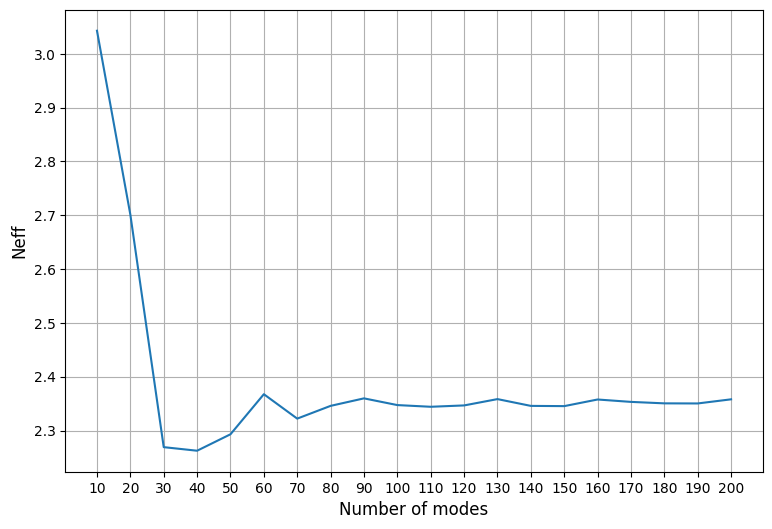

In [247]:
plt.figure(figsize = (9,6))
plt.plot(mesh, modes)
plt.xlabel('Number of modes', fontsize = 12)
plt.ylabel('Neff', fontsize = 12)
plt.xticks(np.linspace(10, 200, 20))
plt.grid(True)

<font size = 6>EME

In [302]:
coupler.switchtolayout()

coupler.setnamed('cc_fiber', {'enabled' : True})

coupler.setactivesolver('EME')

coupler.setnamed('mesh', {'enabled' : True})

In [303]:
coupler.run()
coupler.emepropagate()

<font size = 6>Index

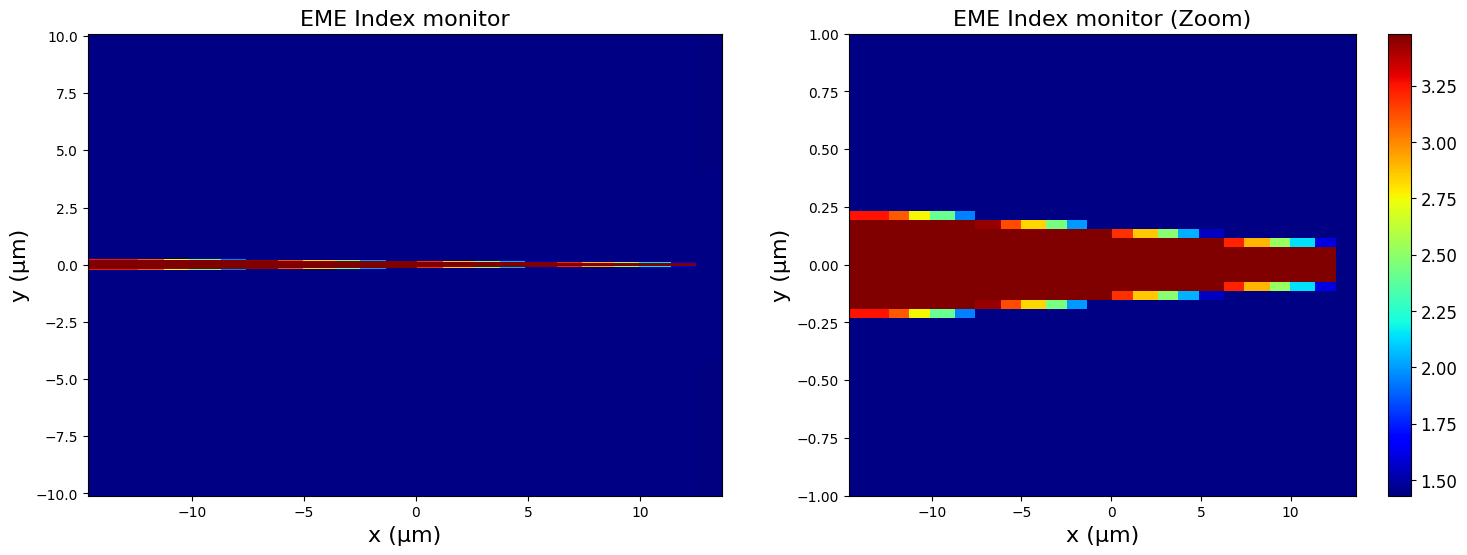

In [330]:
index = coupler.getresult('index', 'index profile')
index_x_axis = index['x']
index_y_axis = index['y']
index_x = index['index_x']

index_x = np.transpose(np.abs(index_x[:,:,0,0]))

fig, ax1 = plt.subplots(1, 2, figsize = (18,6))
ax1[0].pcolormesh(index_x_axis[:,0]*1e6,index_y_axis[:,0]*1e6,index_x,cmap = 'jet',vmin=1.43, vmax = 3.48)
ax1[0].set_xlabel('x (μm)',fontsize=16)
ax1[0].set_ylabel('y (μm)',fontsize=16)
ax1[0].set_title('EME Index monitor', fontsize=16)

mesh = ax1[1].pcolormesh(index_x_axis[:,0]*1e6,index_y_axis[:,0]*1e6,index_x,cmap = 'jet',vmin=1.43, vmax = 3.48)
ax1[1].set_xlabel('x (μm)',fontsize=16)
ax1[1].set_ylabel('y (μm)',fontsize=16)
ax1[1].set_title('EME Index monitor (Zoom)', fontsize=16)
ax1[1].set_ylim(-1,1)
cbar = plt.colorbar(mesh)
cbar.ax.tick_params(labelsize=12)

<font size = 6>Field profile

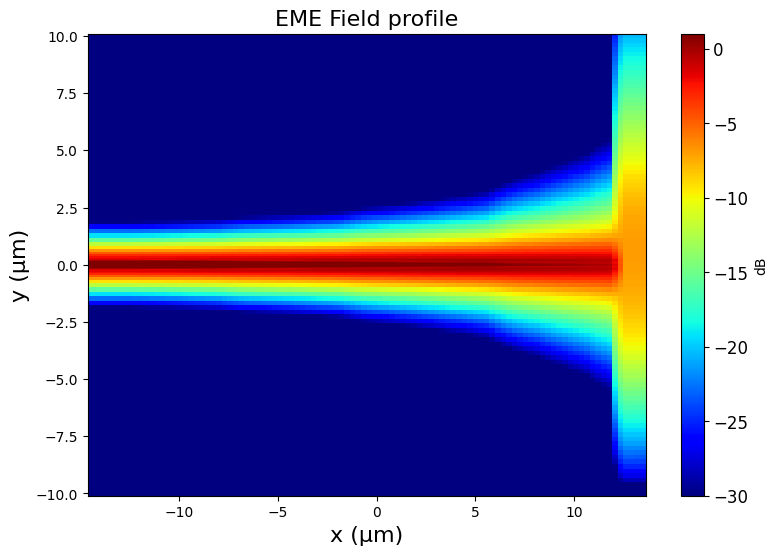

In [350]:
profile = coupler.getresult('profile', 'field profile')
profile_x = profile['x']
profile_y = profile['y']
E = profile['E']

E = np.sqrt(E[:,:,0,0,0]**2 + E[:,:,0,0,1]**2 + E[:,:,0,0,2]**2)
E = np.transpose(abs(E))
Elog = 10*np.log10(E)

plt.figure(figsize = (9,6))
plt.pcolormesh(profile_x[:,0]*1e6,profile_y[:,0]*1e6,Elog,cmap = 'jet',vmin=-30, vmax = 1)
plt.xlabel('x (μm)',fontsize=16)
plt.ylabel('y (μm)',fontsize=16)
plt.title('EME Field profile', fontsize=16)
cbar = plt.colorbar(label = 'dB')
cbar.ax.tick_params(labelsize=12)

<font size = 6>Propagation sweep

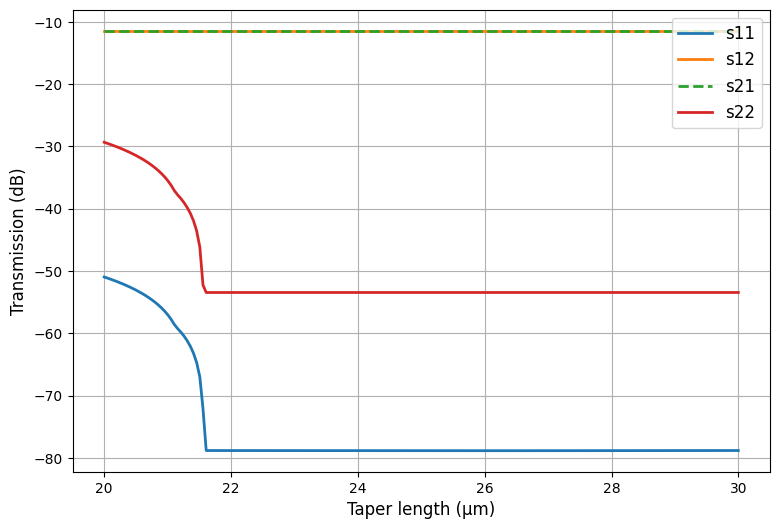

In [378]:
coupler.setemeanalysis('propagation sweep', True)
coupler.setemeanalysis('parameter', 'group span 2')
coupler.setemeanalysis('start', 20e-6)
coupler.setemeanalysis('stop', 30e-6)
coupler.setemeanalysis('number of points', 200)
coupler.emesweep()

S = coupler.getemesweep('S')
x_axis = S['group_span_2']
s11 = 10*np.log10(np.abs(S['s11']))
s12 = 10*np.log10(np.abs(S['s12']))
s21 = 10*np.log10(np.abs(S['s21']))
s22 = 10*np.log10(np.abs(S['s22']))

plt.figure(figsize = (9,6))
plt.plot(x_axis*1e6, s11, label = 's11', linewidth = 2)
plt.plot(x_axis*1e6, s12, label = 's12', linewidth = 2)
plt.plot(x_axis*1e6, s21, label = 's21', linewidth = 2, ls = '--')
plt.plot(x_axis*1e6, s22, label = 's22', linewidth = 2)
plt.xlabel('Taper length (μm)', fontsize = 12)
plt.ylabel('Transmission (dB)', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid(True)

coupler.setemeanalysis('propagation sweep', False)

<font size = 6>Wavelength sweep

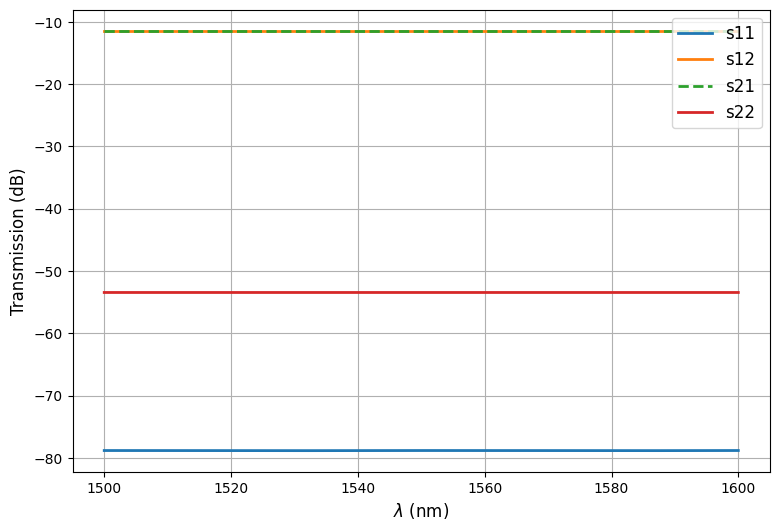

In [379]:
coupler.setemeanalysis('wavelength sweep', True)
coupler.setemeanalysis('start wavelength', 1500e-9)
coupler.setemeanalysis('stop wavelength', 1600e-9)
coupler.setemeanalysis('number of wavelength points', 200)
coupler.emesweep('wavelength sweep')

S = coupler.getemesweep('S_wavelength_sweep')
x_axis = S['wavelength']
s11 = 10*np.log10(np.abs(S['s11']))
s12 = 10*np.log10(np.abs(S['s12']))
s21 = 10*np.log10(np.abs(S['s21']))
s22 = 10*np.log10(np.abs(S['s22']))

plt.figure(figsize = (9,6))
plt.plot(x_axis*1e9, s11, label = 's11', linewidth = 2)
plt.plot(x_axis*1e9, s12, label = 's12', linewidth = 2)
plt.plot(x_axis*1e9, s21, label = 's21', linewidth = 2, ls = '--')
plt.plot(x_axis*1e9, s22, label = 's22', linewidth = 2)
plt.xlabel(r'$\lambda$ (nm)', fontsize = 12)
plt.ylabel('Transmission (dB)', fontsize = 12)
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid(True)

coupler.setemeanalysis('wavelength sweep', False)

<font size = 6>Mode sweep

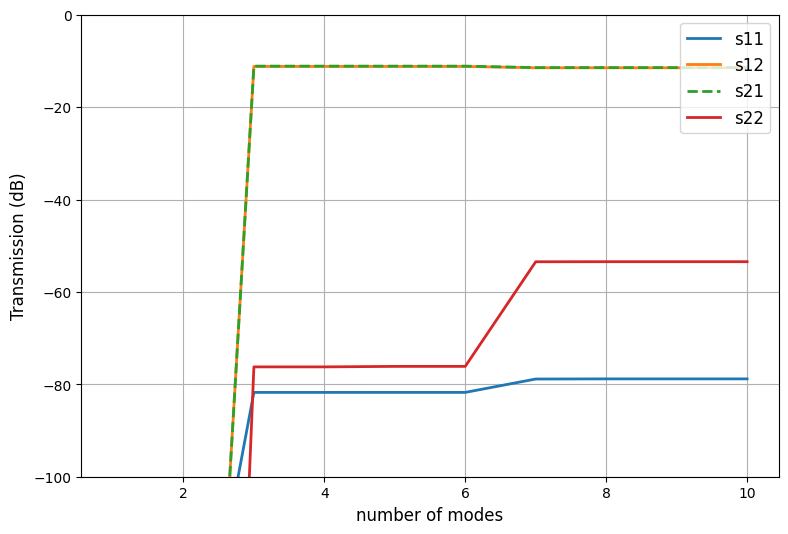

In [383]:
coupler.setemeanalysis('mode convergence sweep', True)
coupler.setemeanalysis('start mode', 1)
coupler.setemeanalysis('mode interval', 1)
coupler.emesweep('mode convergence sweep')

S = coupler.getemesweep('S_mode_convergence_sweep')
x_axis = S['modes']
s11 = 10*np.log10(np.abs(S['s11']))
s12 = 10*np.log10(np.abs(S['s12']))
s21 = 10*np.log10(np.abs(S['s21']))
s22 = 10*np.log10(np.abs(S['s22']))

plt.figure(figsize = (9,6))
plt.plot(x_axis, s11, label = 's11', linewidth = 2)
plt.plot(x_axis, s12, label = 's12', linewidth = 2)
plt.plot(x_axis, s21, label = 's21', linewidth = 2, ls = '--')
plt.plot(x_axis, s22, label = 's22', linewidth = 2)
plt.xlabel('number of modes', fontsize = 12)
plt.ylabel('Transmission (dB)', fontsize = 12)
plt.ylim(-100, 0)
plt.legend(loc = 'upper right', fontsize = 12)
plt.grid(True)

coupler.setemeanalysis('mode convergence sweep', False)